# Networkx

**NetworkX** is a Python library for working with graphs or networks. It provides tools for creating, manipulating, and analyzing complex networks. 

NetworkX is widely used in various fields, including:
- Social network analysis
- Biology
- Physics
- Computer science

It is an open-source library, which means that it is free to use, modify, and distribute.

**NetworkX** requires Python 3.8, 3.9, or 3.10. 

To check your Python version, you can open a command prompt and type:

```
python --version
```

Then press Enter. This will show you the version of Python that is currently installed on your system.

## 1-Installing Networkx

In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2-Types of Networks

In [43]:
#import
import networkx as nx

### A) Simple Netwrok (undirected & unweighted)

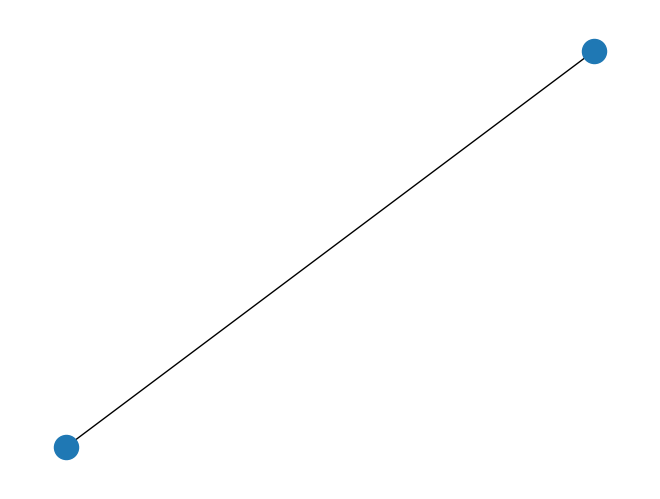

In [2]:
G=nx.Graph()

#what will happen if we dont specifies the nodes first?
G.add_edge("A","B") 

nx.draw(G)

### B) Weighted Network

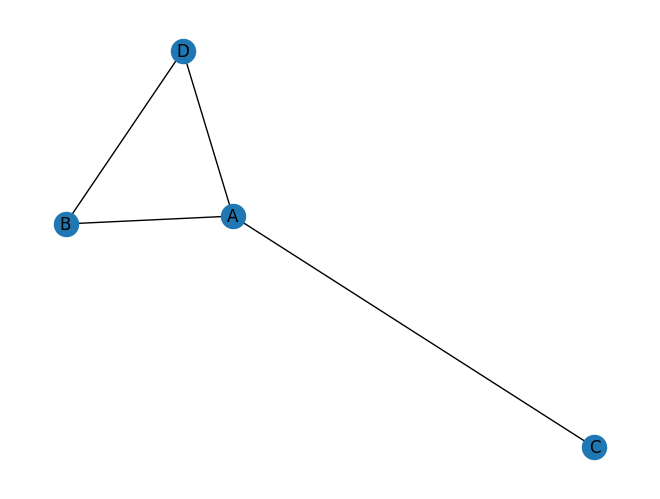

In [44]:
#weighted Network
G_weighted=nx.Graph()

G_weighted.add_edge("A","B",weight=6)
G_weighted.add_edge("A","D",weight=3)
G_weighted.add_edge("A","C",weight=0.5)
G_weighted.add_edge("B","D",weight=1)

# draw the nodes with labels
nx.draw(G_weighted, with_labels=True)

In [173]:
#edges 
list(G_weighted.edges())

[('A', 'B'), ('A', 'D'), ('A', 'C'), ('B', 'D')]

In [176]:
list(G_weighted.edges(data=True)) #a triplet with a dictionary(the third one)

[('A', 'B', {'weight': 6}),
 ('A', 'D', {'weight': 3}),
 ('A', 'C', {'weight': 0.5}),
 ('B', 'D', {'weight': 1})]

In [178]:
G_weighted.edges["A","B"]

{'weight': 6}

In [179]:
G_weighted.edges["A","C"]["weight"]

0.5

### C) Directed Network

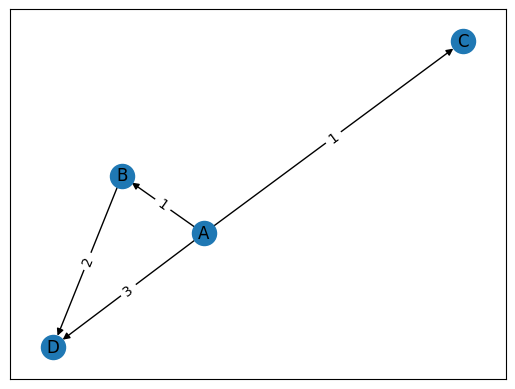

In [49]:
#directed graph
G_di=nx.DiGraph()

G_di.add_edge("A","B",weight=1)
G_di.add_edge("A","D",weight=3)
G_di.add_edge("A","C",weight=1)
G_di.add_edge("B","D",weight=2)

# create a dictionary of positions for the nodes
pos = nx.spring_layout(G_di)

# draw the graph
nx.draw_networkx_nodes(G_di, pos)
nx.draw_networkx_edges(G_di, pos)
nx.draw_networkx_labels(G_di, pos)

# create a dictionary of edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G_di.edges(data=True)}

# draw the edge labels
nx.draw_networkx_edge_labels(G_di, pos, edge_labels=edge_labels)

# show the plot
import matplotlib.pyplot as plt
plt.show()

In NetworkX, there are several layout algorithms that can be used to position the nodes of a graph in a visualization, including:

1. `nx.spring_layout()`: This algorithm uses a force-directed approach to layout the nodes. Nodes that are connected by edges are attracted to each other, while nodes that are not connected are repelled. The algorithm tries to minimize the energy of the system by adjusting the position of the nodes.


2. `nx.circular_layout()`: This algorithm positions the nodes evenly around a circle.


3. `nx.spectral_layout()`: This algorithm uses the eigenvectors of the graph's adjacency matrix to position the nodes. The eigenvectors are used to project the nodes into a lower-dimensional space, and the positions of the nodes are then determined by optimizing a cost function.


4. `nx.random_layout()`: This algorithm positions the nodes randomly in a given bounding box.


5. `nx.shell_layout()`: This algorithm positions the nodes in concentric circles or shells, with nodes in the same shell having the same distance to the center.


6. `nx.kamada_kawai_layout()`: This algorithm uses an iterative optimization approach to layout the nodes. The algorithm tries to minimize the stress of the system by adjusting the position of the nodes.


7. `nx.fruchterman_reingold_layout()`: This algorithm is a variation of the `nx.spring_layout()` algorithm, and also uses a force-directed approach to layout the nodes.

Each layout algorithm has its strengths and weaknesses, and the best one to use depends on the characteristics of the graph and the goals of the visualization. NetworkX allows you to easily apply these layout algorithms to your graphs and create visualizations that help you understand and communicate the structure of the network.

### D) Signed Network

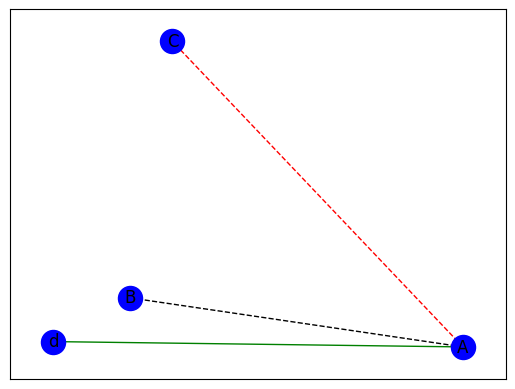

In [53]:
#signed Network
Signed_G=nx.Graph()

#addin edges
Signed_G.add_edge("A","B",sign="*")
Signed_G.add_edge("A","C",sign="-")
Signed_G.add_edge("A","d",sign="+")

# choosing layout algorithm
pos = nx.random_layout(Signed_G)

# create a dictionary of edge colors based on the sign of each edge
edge_colors = {'+': 'green', '-': 'red', "*":"black"}
colors = [edge_colors[Signed_G[u][v]['sign']] for u, v in Signed_G.edges()]

#create a dictionary of edge styles based on the sign of each edge
edge_styles = {'+': 'solid', '-': 'dashed', "*":"dashed"}
styles = [edge_styles[Signed_G[u][v]['sign']] for u, v in Signed_G.edges()]

# draw the graph with colored and styled edges
nx.draw_networkx_nodes(Signed_G, pos, node_color='blue')
nx.draw_networkx_edges(Signed_G, pos, edge_color=colors, style=styles)
nx.draw_networkx_labels(Signed_G, pos)

# show the plot
plt.show()

### E) Multigraph

A `MultiGraph` is a type of graph in NetworkX that allows multiple edges between a pair of nodes. In other words, a `MultiGraph` can have parallel edges, while a standard `Graph` can only have a single edge between any pair of nodes.

In simpler terms, a `MultiGraph` is a network where multiple edges can connect the same nodes.

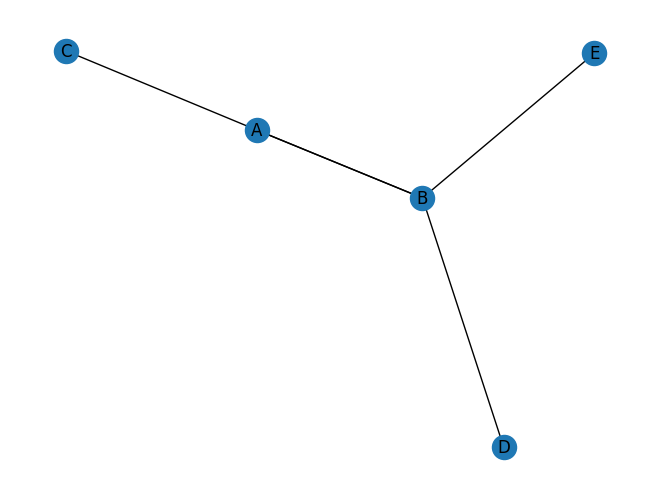

In [60]:
#multigraph
Multi_G=nx.MultiGraph()

Multi_G.add_edge("A","B",relation="family",wieght=1)
Multi_G.add_edge("A","C",relation="family",wieght=2)
Multi_G.add_edge("A","B",relation="Work",wieght=3)
Multi_G.add_edge("D","B",relation="Work",wieght=1)
Multi_G.add_edge("B","E",relation="Friend",wieght=2)

nx.draw(Multi_G,with_labels=True)

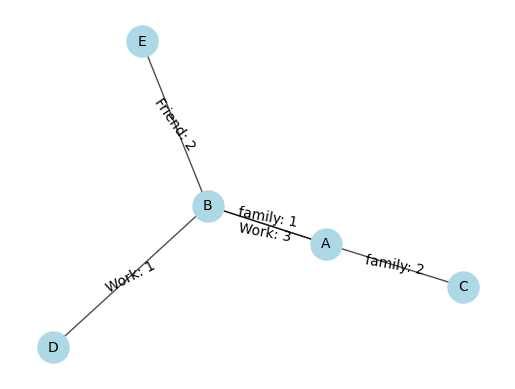

In [61]:
#better visualization 

#pos
pos = nx.spring_layout(Multi_G)

# Draw the nodes
nx.draw_networkx_nodes(Multi_G, pos, node_color='lightblue', node_size=500)

# Draw the edges
edge_labels = {}
for u, v, d in Multi_G.edges(data=True):
    if (u, v) in edge_labels:
        edge_labels[(u, v)] += "\n" + d["relation"] + ": " + str(d["weight"])
    else:
        edge_labels[(u, v)] = d["relation"] + ": " + str(d["weight"])

nx.draw_networkx_edge_labels(Multi_G, pos, edge_labels=edge_labels)
nx.draw_networkx_edges(Multi_G, pos, width=1, alpha=0.7)

# Draw the labels
nx.draw_networkx_labels(Multi_G, pos, font_size=10, font_family="sans-serif")

plt.axis("off")
plt.show()

In [62]:
#edges
list(Multi_G.edges())

[('A', 'B'), ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E')]

In [63]:
#G.edges(data=True)
list(Multi_G.edges(data=True))

[('A', 'B', {'relation': 'family', 'weight': 1}),
 ('A', 'B', {'relation': 'Work', 'weight': 3}),
 ('A', 'C', {'relation': 'family', 'weight': 2}),
 ('B', 'D', {'relation': 'Work', 'weight': 1}),
 ('B', 'E', {'relation': 'Friend', 'weight': 2})]

In [64]:
#listing edges specifically
list(Multi_G.edges(data="relation"))

[('A', 'B', 'family'),
 ('A', 'B', 'Work'),
 ('A', 'C', 'family'),
 ('B', 'D', 'Work'),
 ('B', 'E', 'Friend')]

In [65]:
#a particular edge
Multi_G.edges["A","B"] #error

ValueError: not enough values to unpack (expected 3, got 2)

In [66]:
#instead
#attributes in multigraph
dict(Multi_G["A"]["B"])

{0: {'relation': 'family', 'weight': 1}, 1: {'relation': 'Work', 'weight': 3}}

In [67]:
list(Multi_G.edges("B"))

[('B', 'A'), ('B', 'A'), ('B', 'D'), ('B', 'E')]

In [68]:
Multi_G["A"]["B"][0]["relation"]

'family'

### F) Directed MultiGraph

In [70]:
#Directed MultiGraph
MMultiDi_G=nx.MultiDiGraph()

#...

### H) Bipartite Graph

A bipartite graph is a type of graph in which the nodes can be divided into two disjoint sets, such that all edges connect a node from one set to a node in the other set. In other words, there are no edges that connect nodes within the same set.

Bipartite graphs are useful for modeling relationships between two different types of entities, such as buyers and sellers in a market, or actors and movies in a film industry.

In NetworkX, you can create and manipulate bipartite graphs using the `bipartite` module, which provides various functions and algorithms for bipartite graphs. Additionally, there are several visualization techniques that can be used to display bipartite graphs, such as the bipartite layout, which arranges the nodes in two distinct rows.

stockholders and stocks Example:

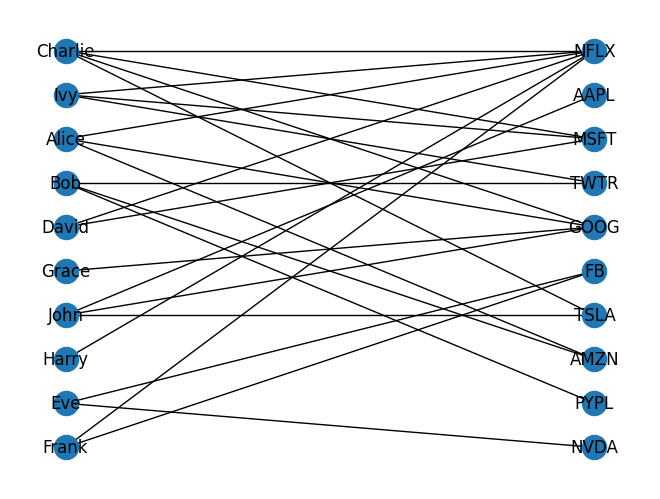

In [83]:
from networkx.algorithms import bipartite

# list of stockholders
stockholders = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Harry', 'Ivy', 'John']

# list of stocks
stocks = ['AAPL', 'GOOG', 'TSLA', 'AMZN', 'FB', 'MSFT', 'NVDA', 'PYPL', 'NFLX', 'TWTR']

# create a bipartite graph
B = nx.Graph()

#adding nodes from list
B.add_nodes_from(stockholders, bipartite=0)
B.add_nodes_from(stocks, bipartite=1)

#adding edges randomly
import random
while not nx.is_connected(B):
    B.add_edge(random.choice(stockholders), random.choice(stocks))

# draw the bipartite graph
pos = nx.bipartite_layout(B, stockholders)
nx.draw(B, pos, with_labels=True)

# show the plot
plt.show()

In [84]:
#2 sets of a bipartite network
bipartite.sets(B)

({'Alice',
  'Bob',
  'Charlie',
  'David',
  'Eve',
  'Frank',
  'Grace',
  'Harry',
  'Ivy',
  'John'},
 {'AAPL',
  'AMZN',
  'FB',
  'GOOG',
  'MSFT',
  'NFLX',
  'NVDA',
  'PYPL',
  'TSLA',
  'TWTR'})

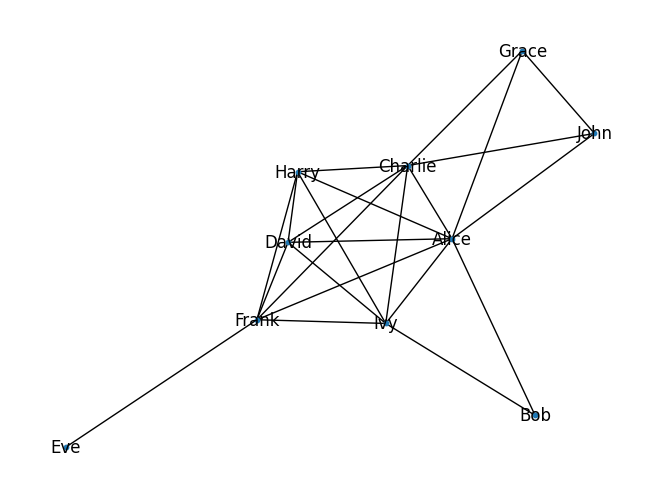

In [85]:
#L-partite graph (stockholders) 
#L=left , R=right

#2 stockholders that have a stock in common are connected

#L-partite graph
P=bipartite.projected_graph(B,bipartite.sets(B)[0])
nx.draw(P, with_labels=True,node_size=10)
plt.show()

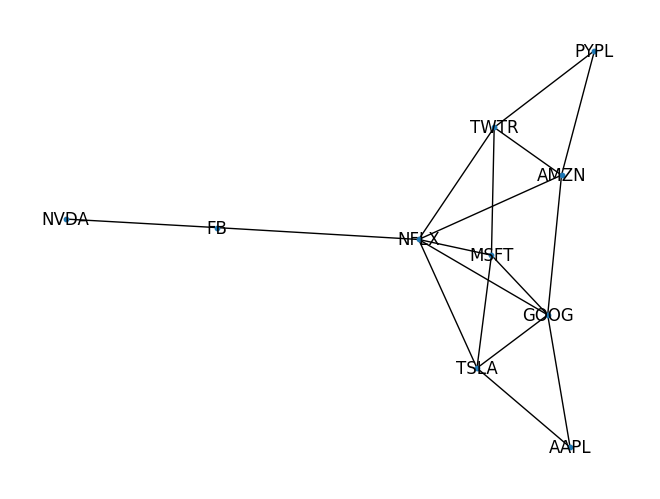

In [86]:
#R-partite graph
P=bipartite.projected_graph(B,bipartite.sets(B)[1])
nx.draw(P, with_labels=True,node_size=10)
plt.show()

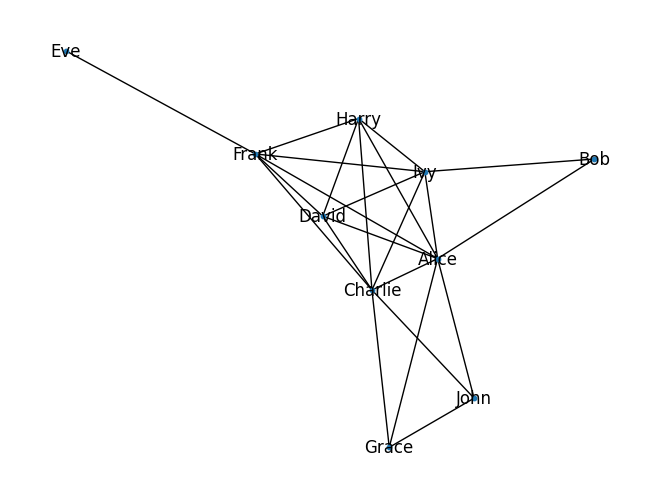

In [87]:
# A wighted L-partite
#how many in common
P=bipartite.weighted_projected_graph(B,bipartite.sets(B)[0])
nx.draw(P, with_labels=True,node_size=10)
plt.show()

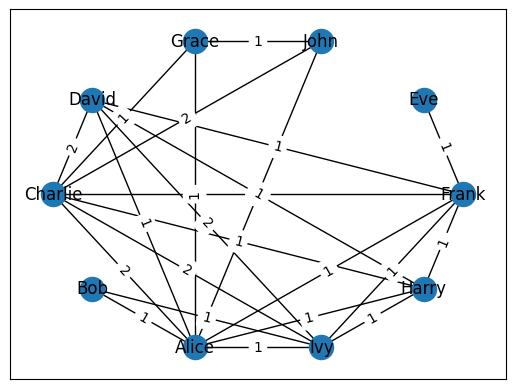

<Figure size 5000x3000 with 0 Axes>

In [88]:
#better visualization
P=bipartite.weighted_projected_graph(B,bipartite.sets(B)[0])
pos = nx.circular_layout(P)

# draw the graph
nx.draw_networkx_nodes(P, pos)
nx.draw_networkx_edges(P, pos)
nx.draw_networkx_labels(P, pos)

# create a dictionary of edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in P.edges(data=True)}

# draw the edge labels
nx.draw_networkx_edge_labels(P, pos, edge_labels=edge_labels)

# show the plot
plt.figure(figsize=(50, 30))
plt.show()

### Node Attributes:

In [89]:
#Node attributes in NetworkX
Graph=nx.Graph()
Graph.add_edge("A","B")
Graph.add_edge("C","B")
Graph.add_edge("A","C")

Graph.add_node("A",role='trader') #the node adding does not affect the edges

In [90]:
list(Graph.nodes())

['A', 'B', 'C']

In [91]:
list(Graph.nodes(data=True))

[('A', {'role': 'trader'}), ('B', {}), ('C', {})]

In [92]:
Graph.nodes['A']['role']

'trader'

## 3- Importing Network information 

### A) Importing from file.txt and GEXF file

To import network information into NetworkX, you can use one of several functions depending on the format of your data. Here are some examples:

1. Importing from an edge list file:

Suppose you have an edge list file in the following format:

```
A B
A C
B D
C D
D E
```

You can import this file into a NetworkX graph using the `read_edgelist` function as follows:

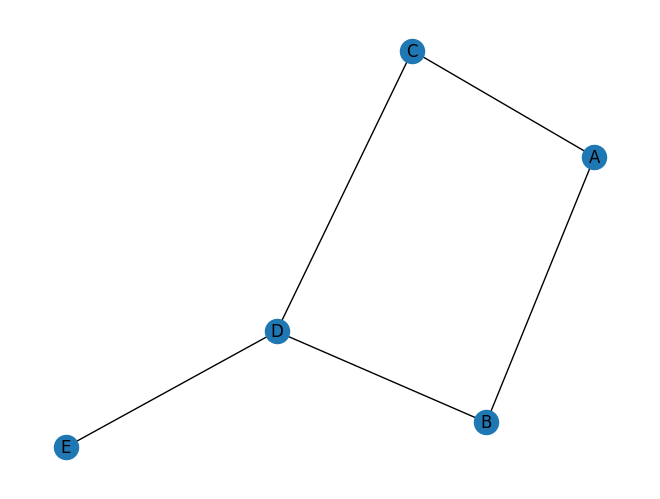

In [94]:
G = nx.read_edgelist('Sample1.txt')
nx.draw(G,with_labels=True)

2. Importing from an adjacency matrix file:

Suppose you have an adjacency matrix file in the following format:

```
0 1 1 0 0
1 0 0 1 0
1 0 0 1 1
0 1 1 0 1
0 0 1 1 0
```

You can import this file into a NetworkX graph using the `from_numpy_matrix` function as follows:

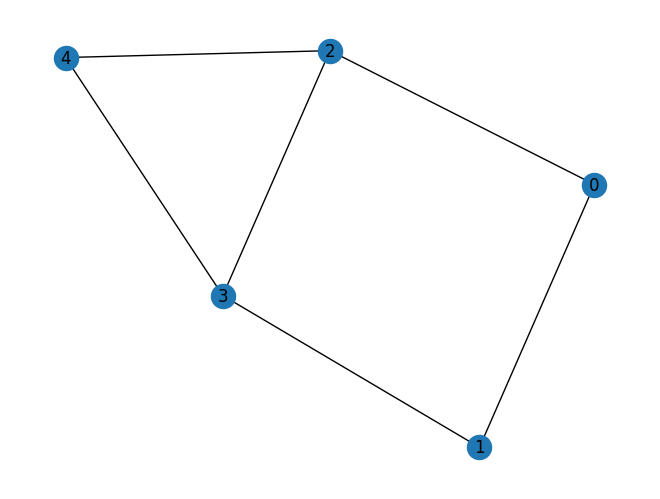

In [101]:
import numpy as np
import networkx as nx

adj_matrix = np.loadtxt('sample2.txt')

#G is the network
G = nx.Graph()

#adding edges
for i in range(adj_matrix.shape[0]):
    for j in range(adj_matrix.shape[1]):
        if adj_matrix[i][j] == 1:
            G.add_edge(i, j)

nx.draw(G,with_labels=True)

3. Importing from a GEXF file:

If you have a network file in the GEXF format, which is a popular format for exchanging graph data between different software packages, you can import it into a NetworkX graph using the `read_gexf` function as follows:

Here's an example of a simple graph in GEXF format:

```xml
<?xml version="1.0" encoding="UTF-8"?>
<gexf xmlns="http://www.gexf.net/1.3" version="1.3">
  <meta lastmodifieddate="2022-10-01">
    <creator>NetworkX</creator>
    <description>An example graph in GEXF format</description>
  </meta>
  <graph mode="static" defaultedgetype="undirected">
    <nodes>
      <node id="0" label="Node 0"/>
      <node id="1" label="Node 1"/>
      <node id="2" label="Node 2"/>
    </nodes>
    <edges>
      <edge id="0" source="0" target="1"/>
      <edge id="1" source="1" target="2"/>
      <edge id="2" source="2" target="0"/>
    </edges>
  </graph>
</gexf>
```

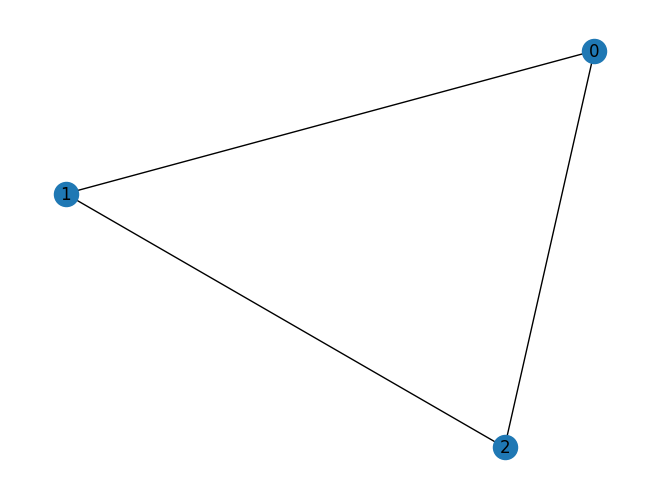

In [103]:
G = nx.read_gexf('Sample3.gexf')
nx.draw(G,with_labels=True)

In [102]:
# Save the graph as a GEXF file
nx.write_gexf(G, 'Sample3.gexf')

### B) Adjacancy Matrix

In [18]:
import numpy as np
import networkx as nx
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

converting the adjacency matrix to a networkx graph using nx.Graph:

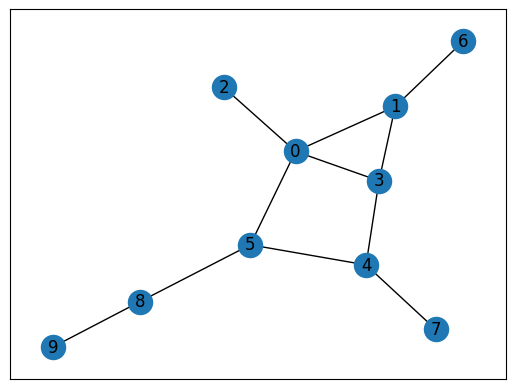

In [19]:
G = nx.Graph(G_mat)
nx.draw_networkx(G)

## 4-Basic Concepts

### A) Degree

The degree of a node in a network is the number of edges that it is connected to. In a network with $N$ nodes and $M$ edges, the degree $k_i$ of a node $i$ is defined as:

$$ k_i = \sum_{j=1}^M A_{ij} $$

where $A$ is the adjacency matrix of the network, with $A_{ij} = 1$ if there is an edge connecting nodes $i$ and $j$, and $A_{ij} = 0$ otherwise.

The neighborhood of a node $i$ is the set of nodes that are directly connected to $i$ by an edge. The neighborhood of $i$ is denoted as $N_i$ and is defined as:

$$ N_i = \{j \mid A_{ij} = 1\} $$

where $A$ is the adjacency matrix of the network, with $A_{ij} = 1$ if there is an edge connecting nodes $i$ and $j$, and $A_{ij} = 0$ otherwise.

In [155]:
node=2
neighborhood = list(nx.neighbors(G_karate, node))
neighborhood

[1, 3, 4, 8, 14, 18, 20, 22, 31]

In [156]:
#degree = # neighbor
len(neighborhood)

9

In [161]:
#Degree
G_karate.degree(node)

9

In [164]:
#All degrees
dict(G_karate.degree)

{1: 16,
 2: 9,
 3: 10,
 4: 6,
 5: 3,
 6: 4,
 7: 4,
 8: 4,
 9: 5,
 10: 2,
 11: 3,
 12: 1,
 13: 2,
 14: 5,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 3,
 21: 2,
 22: 2,
 23: 2,
 24: 5,
 25: 3,
 26: 3,
 27: 2,
 28: 4,
 29: 3,
 30: 4,
 31: 4,
 32: 6,
 33: 12,
 34: 17}

### B) Triadic closure

Triadic closure refers to the tendency for people who share connections in a social network to become connected, also known as the "friend of a friend" effect.

One measure of triadic closure in a network is the clustering coefficient, which quantifies the degree to which nodes tend to cluster together in triads. The clustering coefficient of a node is defined as the fraction of the node's neighbors that are also neighbors of each other. The clustering coefficient of a network is the average clustering coefficient over all nodes in the network.

#### Clustering Coefficient

The clustering coefficient of a node $i$ is given by:

$$C_i = \frac{2e_i}{k_i(k_i-1)}$$

where $e_i$ is the number of edges between the neighbors of node $i$, and $k_i$ is the degree of node $i$ (i.e., the number of edges incident to $i$).

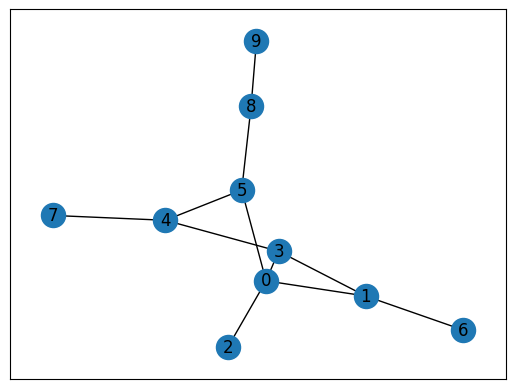

In [5]:
nx.draw_networkx(G)

In [6]:
#local clustring (if dominator is zero => zero)
nx.clustering(G,2)

0

In [7]:
#list of Clustring Coefficients
nx.clustering(G)

{0: 0.16666666666666666,
 1: 0.3333333333333333,
 2: 0,
 3: 0.3333333333333333,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0}

##### Global Clustring Coefficient

Many observed social networks are more clustered than would arise at random

The clustering coefficient of the network is the average of the clustering coefficients of all nodes:

$$C = \frac{1}{N}\sum_{i=1}^{N} C_i$$

where $N$ is the total number of nodes in the network.

In [9]:
#Average clustering
nx.average_clustering(G)

0.08333333333333333

#### Transitivity

Transitivity is a property of a network that measures the likelihood that, if two nodes in the network share a common neighbor, they will also be directly connected to each other. In other words, it measures the tendency for "triangles" to form in the network.

Formally, the transitivity of a network is defined as the ratio of the number of triangles in the network to the number of connected triples of nodes (i.e., triples of nodes that are directly connected to each other or share a common neighbor). In mathematical notation, the transitivity of a network is given by:

$$
T = \frac{3 \times \text{number of triangles}}{\text{number of connected triples}}
$$

A high transitivity indicates that nodes in the network tend to form clusters or communities, while a low transitivity indicates that the network is more of a random or decentralized structure. Transitivity is closely related to the concept of clustering coefficient, which measures the tendency for nodes to form local clusters or neighborhoods.

In [10]:
#transitivity
#transitivity weights nodes with large degree higher
nx.transitivity(G)

0.15789473684210525

### C) Path

A path between two nodes $A$ and $B$ in a network is a sequence of nodes $A, X_1, X_2, ..., X_n, B$ and a sequence of edges $(A, X_1), (X_1, X_2), ..., (X_n, B)$, where each node and edge in the sequence is adjacent to the previous and next node or edge in the sequence.

The length of a path is the number of edges in the path. A path with length 1 is an edge between two nodes, while a path with length 2 is a sequence of two edges and three nodes, and so on. The shortest path between two nodes is the path with the minimum length that connects them.

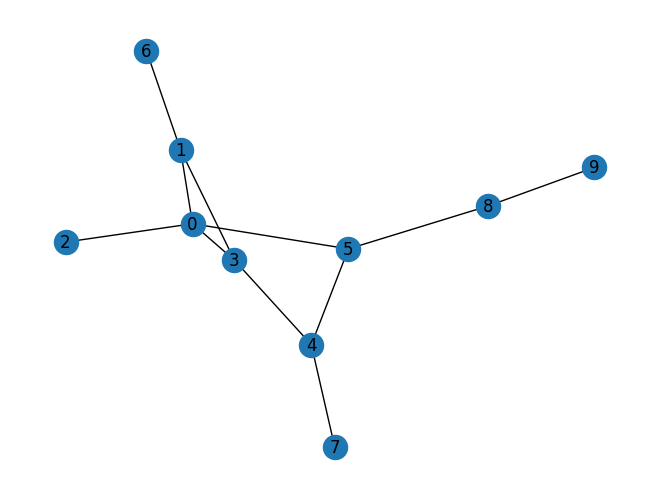

In [11]:
nx.draw(G,with_labels=True)

In [9]:
# generate all simple paths between nodes 1 and 3
paths = nx.all_simple_paths(G, source=1, target=3)

# convert the generator to a list
Path_List = [path for path in paths]

print("List of Path:", Path_List)

List of Path: [[1, 0, 3], [1, 0, 5, 4, 3], [1, 3]]


In [16]:
Path1=Path_List[0]
# check if a path is valid in the graph
is_valid = nx.is_simple_path(G, Path1) #A simple path is a path that does not contain any repeated nodes.
print("Is valid path?", is_valid)

Is valid path? True


In [18]:
# a False example
nx.is_simple_path(G, [0,8,5])

False

In [19]:
# compute the edge list of a walk
edge_list = [(Path1[i], Path1[i+1]) for i in range(len(Path1)-1)] #len(Path1)-1=length of a path
edge_list

[(1, 0), (0, 3)]

In [20]:
# compute the weight of a walk
weight = sum(G[u][v]['weight'] for u, v in edge_list if 'weight' in G[u][v])
print("Weight of walk:", weight)

Weight of walk: 2


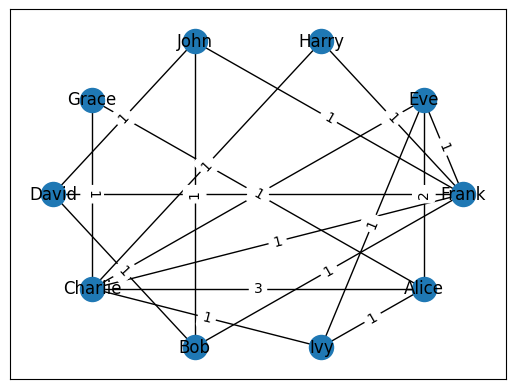

<Figure size 5000x3000 with 0 Axes>

In [28]:
#A weighted Network
P=bipartite.weighted_projected_graph(B,bipartite.sets(B)[0])
pos = nx.circular_layout(P)

# draw the graph
nx.draw_networkx_nodes(P, pos)
nx.draw_networkx_edges(P, pos)
nx.draw_networkx_labels(P, pos)

# create a dictionary of edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in P.edges(data=True)}

# draw the edge labels
nx.draw_networkx_edge_labels(P, pos, edge_labels=edge_labels)

# show the plot
plt.figure(figsize=(50, 30))
plt.show()

In [31]:
#Weighted Graph
Path1=['Eve',"Alice","Ivy"]

edge_list = [(Path1[i], Path1[i+1]) for i in range(len(Path1)-1)] #len(Path1)-1=length of a path

weight = sum(P[u][v]['weight'] for u, v in edge_list if 'weight' in P[u][v])
print("Weight of walk:", weight)

Weight of walk: 3


### D) Cycle

In [34]:
# Find all cycles in the graph
cycles = nx.simple_cycles(G)
list(cycles)

[[0, 1, 3], [0, 1, 3, 4, 5], [0, 3, 4, 5]]

### E) Geodesic

A geodesic between two nodes $A$ and $B$ in a network is the shortest path that connects them. In other words, it is the path with the minimum number of edges that must be traversed to get from node $A$ to node $B$. The length of a geodesic is the number of edges in the path.

In [12]:
#Geodesic = shortest path
nx.shortest_path(G,1,2)

[1, 0, 2]

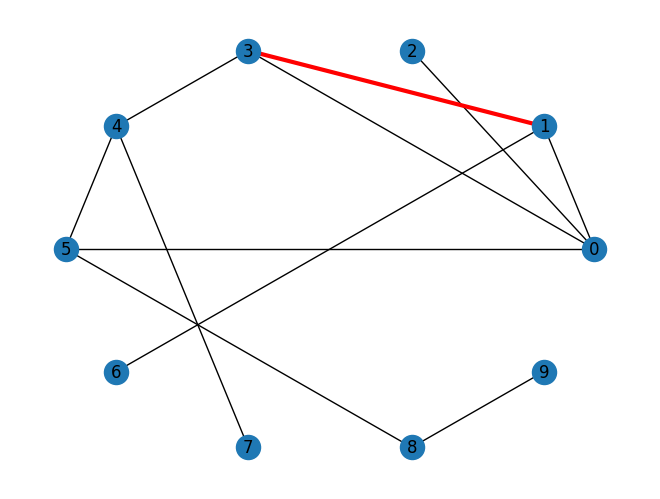

In [13]:
import matplotlib.pyplot as plt
# compute a shortest path between two nodes
path = nx.shortest_path(G, source=1, target=3)

# compute the corresponding edges of the path
edges = [(path[i], path[i+1]) for i in range(len(path)-1)]

# draw the graph and the path
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=3)

In [102]:
#Geodesic length
nx.shortest_path_length(G,1,2)

2

finding the Geodesic from node i to every other node is computationaly complex, so we need an effeicient algorithm to do so.
    
    here we use breadth-first search

[(1, 0), (1, 3), (1, 6), (0, 2), (0, 5), (3, 4), (5, 8), (4, 7), (8, 9)]

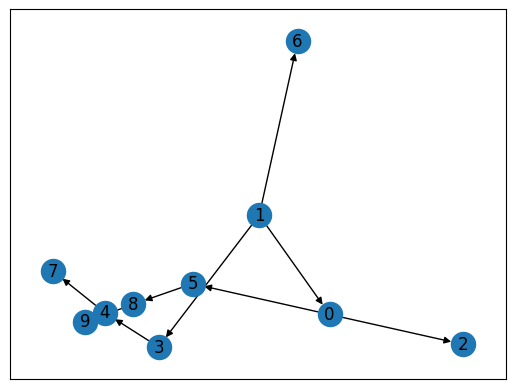

In [20]:
#breadth-first search algorithm
T=nx.bfs_tree(G,1)
nx.draw_networkx(T, with_labels=True)
list(T.edges())

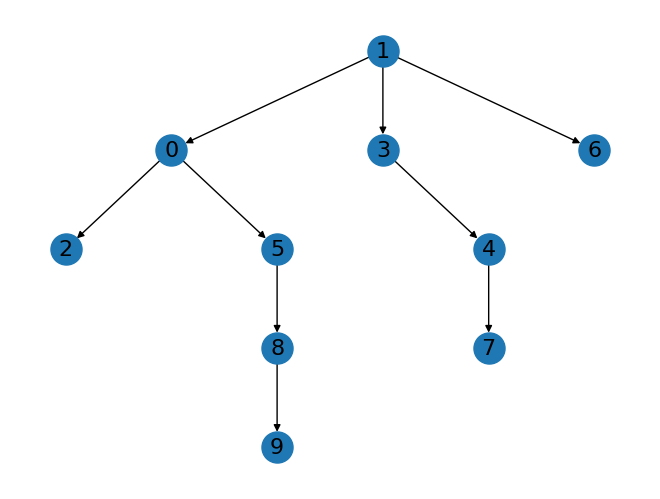

In [24]:
# set the position of nodes
pos = {1: (0, 0), 0: (-1, -1), 3: (0, -1), 6: (1, -1), 2: (-1.5, -2), 5: (-0.5, -2), 4: (0.5, -2), 7: (0.5, -3), 8: (-0.5, -3), 9: (-0.5, -4)}

# draw the tree using networkx
nx.draw(T, pos, with_labels=True, arrows=True, node_size=500, font_size=16)

# show the plot
plt.show()

In [25]:
#all shortest path
nx.shortest_path_length(G,1) # outputs a dictionary

{1: 0, 0: 1, 3: 1, 6: 1, 2: 2, 5: 2, 4: 2, 8: 3, 7: 3, 9: 4}

In [26]:
#Average shortest path
nx.average_shortest_path_length(G)

2.4

### F) Eccentricity

The eccentricity of a node $u$ in a network is the maximum distance between $u$ and any other node in the network. In other words, it is the maximum length of the shortest path between $u$ and any other node. The eccentricity of a network is the maximum eccentricity of any node in the network.

In [33]:
#Eccentricity
#the largest distance between n and all ohter nodes:
nx.eccentricity(G)

{0: 3, 1: 4, 2: 4, 3: 4, 4: 3, 5: 3, 6: 5, 7: 4, 8: 4, 9: 5}

In [34]:
#Diameter: max Eccentricity between two nodes in whole network (max max)
nx.diameter(G)

5

In [36]:
#Diameter is max eccentricity
max(nx.eccentricity(G).values())

5

In [35]:
#radius: min Eccentricity between two nodes in whole network (min max)
nx.radius(G)

3

In [37]:
#radius is min eccentricity
min(nx.eccentricity(G).values())

3

In [30]:
#periphery
#Eccentricity=diameter
nx.periphery(G)

[6, 9]

In [31]:
#the center of a graph : Eccentricity=radius
nx.center(G)

[0, 4, 5]

### G) Connectivity

##### Built in Dataset

NetworkX provides several built-in network datasets that can be used for testing and experimentation. These datasets are available in the NetworkX library itself and can be loaded using functions that start with the prefix `nx.` followed by the name of the dataset.

Here are some examples of the built-in network datasets in NetworkX:

- `nx.karate_club_graph()` - Returns the Zachary's Karate Club network, a social network of a karate club, where each node represents a member of the club, and each edge represents a friendly relationship between members.

- `nx.les_miserables_graph()` - Returns a network of characters in the novel "Les Miserables" by Victor Hugo, where each node represents a character in the novel, and each edge represents a co-occurrence of two characters in a chapter.

- `nx.davis_southern_women_graph()` - Returns a network of the social interactions between women in a southern US town in the 1930s, where each node represents a woman, and each edge represents a social relation between two women.

These are just a few examples of the built-in network datasets in NetworkX. You can find more information about the available datasets and their usage in the NetworkX documentation.

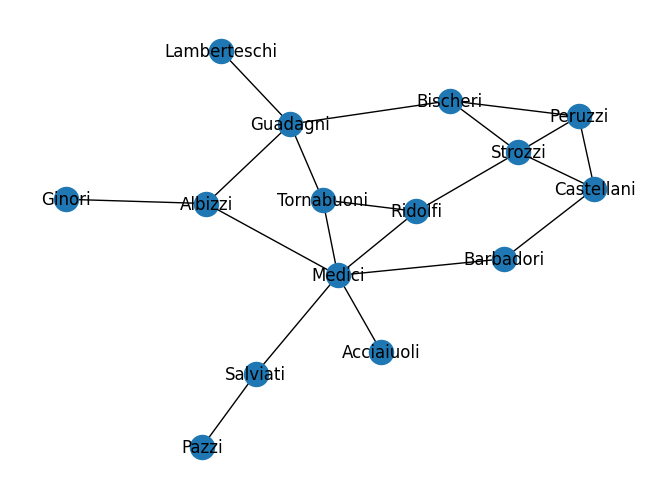

In [61]:
#An example
SampleG=nx.florentine_families_graph()
#SampleG=nx.convert_node_labels_to_integers(SampleG,first_label=1)
nx.draw(SampleG,with_labels=True)

#### The Karate Club graph

The Karate Club graph is a social network representing friendships among 34 members of a karate club, as observed by Wayne W. Zachary in 1977. Each node in the graph represents a member of the club, and each edge represents a friendship between two members. The graph has 34 nodes and 78 edges.

The Karate Club is a well-known example in social network analysis and has been used to study various network properties, such as community structure and centrality measures. The graph is characterized by a split in the club into two factions, led by the club instructor (node 0) and one of the members (node 33), respectively. This split was caused by a dispute between the two leaders, which eventually led to the formation of two separate karate clubs.

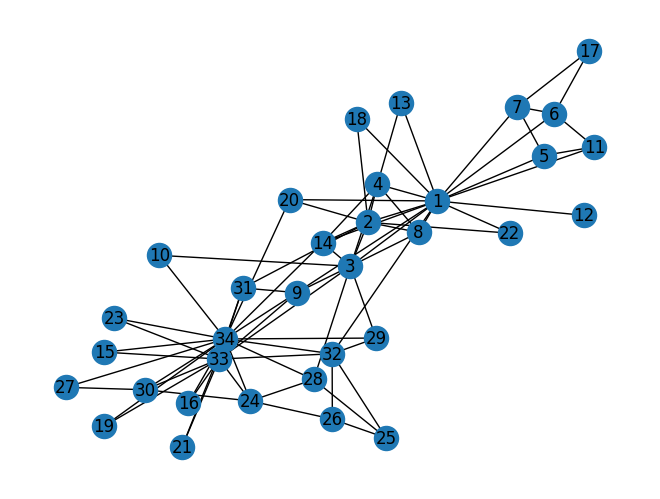

In [62]:
#Karate Club
G=nx.karate_club_graph()
G=nx.convert_node_labels_to_integers(G,first_label=1)
nx.draw(G,with_labels=True)

the club instructor (node 0) and one of the members (node 33) representation

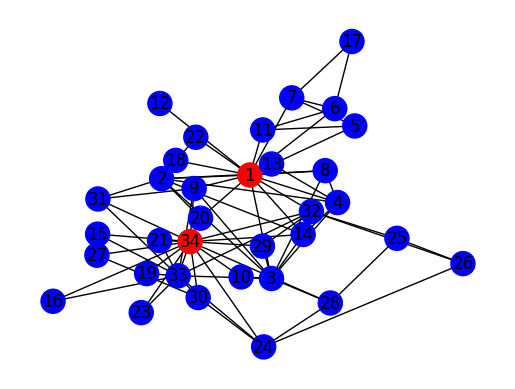

In [72]:
# Set the positions of the nodes using the Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Draw the graph with red nodes for node 0 (club instructor) and node 33 (member) : they are now 1 and 34
red_nodes = [1, 34]
node_colors = ['red' if node in red_nodes else 'blue' for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos)

# Draw the labels for the nodes
nx.draw_networkx_labels(G, pos)

# Show the graph
plt.axis('off')
plt.show()

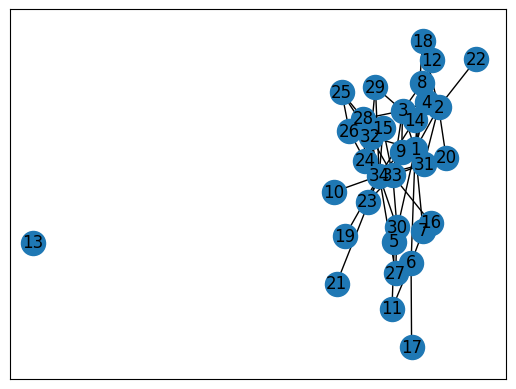

In [50]:
#disconnection based on random selection
import random

while nx.is_connected(G):
    # delete an edge
    i=random.choice(list(nx.nodes(G)))
    j=random.choice(list(nx.nodes(G)))             
    if G.has_edge(i, j):
        G.remove_edge(i, j)
nx.draw_networkx(G)

In [51]:
#connectivity
#connected components
nx.number_connected_components(G)

2

In [52]:
sorted(nx.connected_components(G))

[{1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34},
 {13}]

In [54]:
#which component  each node belongs?
nx.node_connected_component(G,1)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34}

##### connectivity in directed graphs
weakly connected = replacing all directed edges with undirected edges produces a conneceted undirected graph


strongly connected = with directions

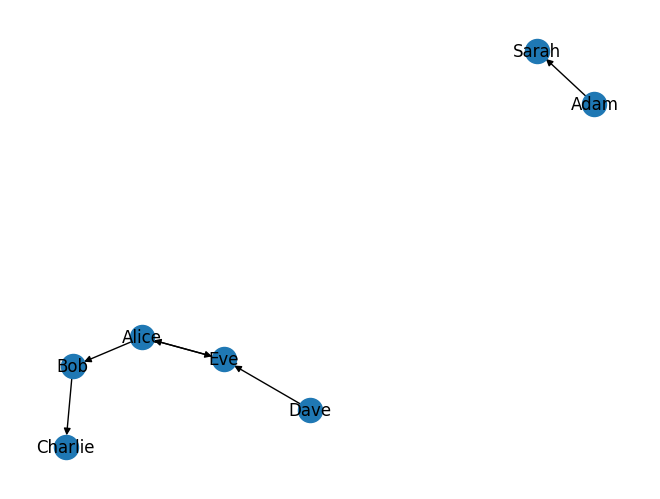

In [64]:
import networkx as nx
import matplotlib.pyplot as plt

# create an empty directed graph
Directed_G = nx.DiGraph()

# add nodes to the graph
Directed_G.add_nodes_from(['Alice', 'Bob', 'Charlie', 'Dave', 'Eve','Adam','Sarah'])

# add directed edges to the graph
Directed_G.add_edge('Alice', 'Bob')
Directed_G.add_edge('Bob', 'Charlie')
Directed_G.add_edge('Dave', 'Eve')
Directed_G.add_edge('Alice','Eve')
Directed_G.add_edge('Eve','Alice')
Directed_G.add_edge('Adam','Sarah')
#Directed_G.add_edge('Adam','Bob')

# draw the graph
nx.draw(Directed_G, with_labels=True)

# show the plot
plt.show()

In [65]:
#weakly connected
nx.is_weakly_connected(Directed_G)

False

In [66]:
#strongly connected
nx.is_strongly_connected(Directed_G)

False

In [67]:
#weakly connected components
sorted(nx.weakly_connected_components(Directed_G))

[{'Alice', 'Bob', 'Charlie', 'Dave', 'Eve'}, {'Adam', 'Sarah'}]

In [68]:
#strongly connected components
sorted(nx.strongly_connected_components(Directed_G))

[{'Charlie'}, {'Bob'}, {'Alice', 'Eve'}, {'Dave'}, {'Sarah'}, {'Adam'}]

### H) Robustness

network robustness is the ability of a network to maintain its general structral properties when it faces failure or attacks
    
types of attack: removal of nodes or edges
    
Robustness = maintain connectivity

examples: airport closure, internet router failures, power line failure


#### Erdős-Rényi random graph

The Erdős-Rényi random graph model is a classic random graph model that generates a graph with a fixed number of nodes, where each pair of nodes is connected with a probability p.

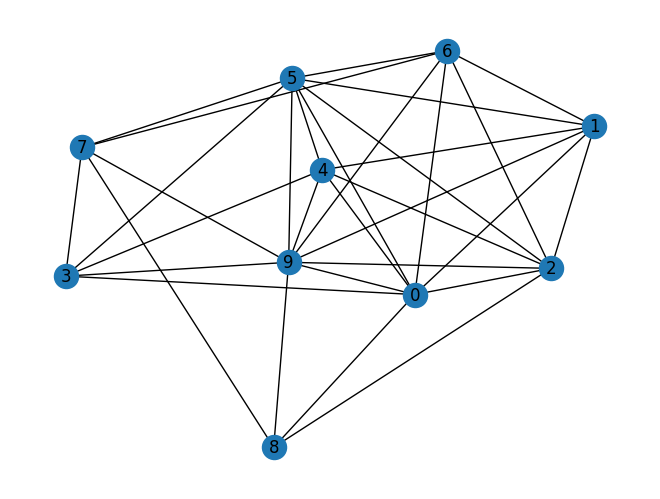

In [85]:
# create an Erdős-Rényi random network

n = 10  # number of nodes
p = 0.6  # probability of edge creation
ER_G = nx.erdos_renyi_graph(n, p)

# draw the graph
nx.draw(ER_G, with_labels=True)

Node connectivity: Minimum number of nodes
needed to disconnect a graph or pair of nodes.

Edge connectivity: Minimum number of edges
needed to disconnect a graph or pair of nodes.

Graphs with large node and edge connectivity are
more robust to the loss of nodes and edges.

In [86]:
#what is the smallest number of nodes that can be romoved from graph in order to disconnect it?
nx.node_connectivity(ER_G)

4

In [87]:
#which nodes?(the smallest set of nodes that needs to be removed to disconnect the graph)
nx.minimum_node_cut(ER_G)

{0, 2, 7, 9}

In [88]:
#what is the smallest number of edges that can be romoved from graph in order to disconnect it?
nx.edge_connectivity(ER_G)

4

In [89]:
#which edge(s)?
nx.minimum_edge_cut(ER_G)

{(8, 0), (8, 2), (8, 7), (8, 9)}

### I) Robustness (specific source and sink)

In [90]:
#all paths from i to j
sorted(nx.all_simple_paths(ER_G,1,2))

[[1, 0, 2],
 [1, 0, 3, 4, 2],
 [1, 0, 3, 4, 5, 2],
 [1, 0, 3, 4, 5, 6, 2],
 [1, 0, 3, 4, 5, 6, 7, 8, 2],
 [1, 0, 3, 4, 5, 6, 7, 8, 9, 2],
 [1, 0, 3, 4, 5, 6, 7, 9, 2],
 [1, 0, 3, 4, 5, 6, 7, 9, 8, 2],
 [1, 0, 3, 4, 5, 6, 9, 2],
 [1, 0, 3, 4, 5, 6, 9, 7, 8, 2],
 [1, 0, 3, 4, 5, 6, 9, 8, 2],
 [1, 0, 3, 4, 5, 7, 6, 2],
 [1, 0, 3, 4, 5, 7, 6, 9, 2],
 [1, 0, 3, 4, 5, 7, 6, 9, 8, 2],
 [1, 0, 3, 4, 5, 7, 8, 2],
 [1, 0, 3, 4, 5, 7, 8, 9, 2],
 [1, 0, 3, 4, 5, 7, 8, 9, 6, 2],
 [1, 0, 3, 4, 5, 7, 9, 2],
 [1, 0, 3, 4, 5, 7, 9, 6, 2],
 [1, 0, 3, 4, 5, 7, 9, 8, 2],
 [1, 0, 3, 4, 5, 9, 2],
 [1, 0, 3, 4, 5, 9, 6, 2],
 [1, 0, 3, 4, 5, 9, 6, 7, 8, 2],
 [1, 0, 3, 4, 5, 9, 7, 6, 2],
 [1, 0, 3, 4, 5, 9, 7, 8, 2],
 [1, 0, 3, 4, 5, 9, 8, 2],
 [1, 0, 3, 4, 5, 9, 8, 7, 6, 2],
 [1, 0, 3, 4, 9, 2],
 [1, 0, 3, 4, 9, 5, 2],
 [1, 0, 3, 4, 9, 5, 6, 2],
 [1, 0, 3, 4, 9, 5, 6, 7, 8, 2],
 [1, 0, 3, 4, 9, 5, 7, 6, 2],
 [1, 0, 3, 4, 9, 5, 7, 8, 2],
 [1, 0, 3, 4, 9, 6, 2],
 [1, 0, 3, 4, 9, 6, 5, 2],
 [1, 0, 3, 4, 9, 6, 5,

In [93]:
#Node Connectivity: from i to j
#If we wanted to block the message from i to j by removing nodes from the network, how many
#nodes would we need to remove?
nx.node_connectivity(ER_G,1,2)

6

In [97]:
#Which nodes?(the set of nodes we must remove in order to block msg from i to j)
#{} when two nodes are connected!
nx.minimum_node_cut(ER_G,1,2)

{}

#### Edge Connectivity

If we wanted to block the message from i to j by
removing edges from the network, how many
edges would we need to remove?

In [98]:
nx.edge_connectivity(ER_G,1,2)

6

In [99]:
#Which edges?
nx.minimum_edge_cut(ER_G,1,2)

{(1, 0), (1, 2), (1, 4), (1, 5), (1, 6), (1, 9)}

## 4-Centrality

Centrality is a measure of the importance of nodes in a network based on their position and connectivity. There are different types of centrality measures, each capturing a different aspect of node importance.

Some common centrality measures include degree centrality, betweenness centrality, closeness centrality, and eigenvector centrality.

### A) Degree Centrality-undirected graphs

Degree centrality is a measure of the importance of a node in a network based on the number of connections it has to other nodes. The degree centrality of a node $i$ can be calculated as:

$$C_D(i) = \frac{k_i}{n-1}$$

where $k_i$ is the degree of node $i$, i.e., the number of edges that are incident to the node, and $n$ is the total number of nodes in the network. The denominator $n-1$ is used to account for the fact that a node cannot be connected to itself.

The degree centrality of a node ranges from 0 to 1, with a higher value indicating a more central node in the network. Nodes with a high degree centrality are typically well-connected to other nodes, and their removal from the network can have a significant impact on its connectivity.

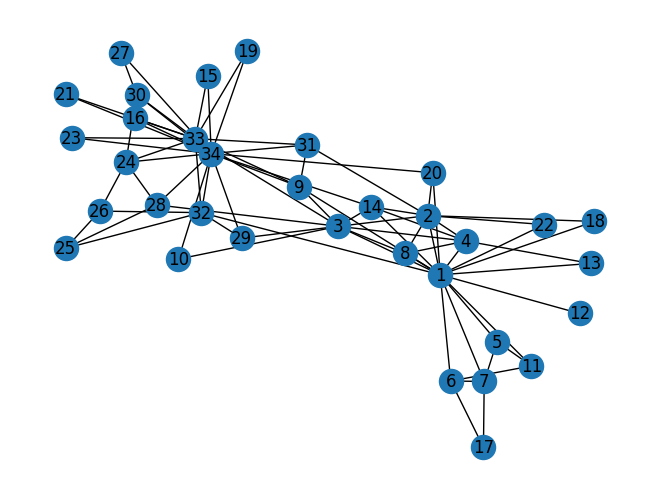

In [100]:
G_karate = nx.karate_club_graph()
G_karate =nx.convert_node_labels_to_integers(G_karate,first_label=1)
nx.draw(G_karate,with_labels=True)

In [107]:
#degree centrality
degCent = nx.degree_centrality(G_karate)
degCent

{1: 0.48484848484848486,
 2: 0.2727272727272727,
 3: 0.30303030303030304,
 4: 0.18181818181818182,
 5: 0.09090909090909091,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.12121212121212122,
 9: 0.15151515151515152,
 10: 0.06060606060606061,
 11: 0.09090909090909091,
 12: 0.030303030303030304,
 13: 0.06060606060606061,
 14: 0.15151515151515152,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.06060606060606061,
 20: 0.09090909090909091,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.06060606060606061,
 24: 0.15151515151515152,
 25: 0.09090909090909091,
 26: 0.09090909090909091,
 27: 0.06060606060606061,
 28: 0.12121212121212122,
 29: 0.09090909090909091,
 30: 0.12121212121212122,
 31: 0.12121212121212122,
 32: 0.18181818181818182,
 33: 0.36363636363636365,
 34: 0.5151515151515151}

In [108]:
#sort based on degree centrality
sorted_degcent = {k: v for k, v in sorted(degCent.items(), key=lambda item: item[1], reverse=True)}
sorted_degcent

{34: 0.5151515151515151,
 1: 0.48484848484848486,
 33: 0.36363636363636365,
 3: 0.30303030303030304,
 2: 0.2727272727272727,
 4: 0.18181818181818182,
 32: 0.18181818181818182,
 9: 0.15151515151515152,
 14: 0.15151515151515152,
 24: 0.15151515151515152,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.12121212121212122,
 28: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.12121212121212122,
 5: 0.09090909090909091,
 11: 0.09090909090909091,
 20: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.09090909090909091,
 29: 0.09090909090909091,
 10: 0.06060606060606061,
 13: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.06060606060606061,
 27: 0.06060606060606061,
 12: 0.030303030303030304}

In [109]:
#degree centrality of a node

degCent[34]

0.5151515151515151

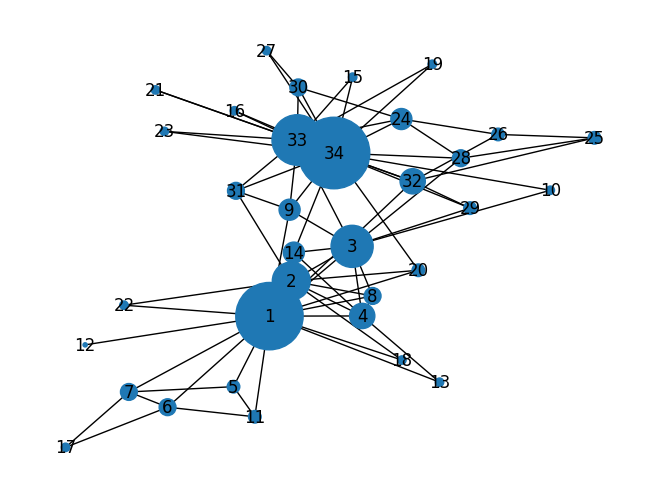

In [112]:
#draw a network with node sizes based on their degree centrality

# create a list of node sizes based on degree centrality
node_sizes = [10000*v*v for v in degCent.values()]

# draw the graph
nx.draw(G, with_labels=True, node_size=node_sizes,pos=nx.spring_layout(G))

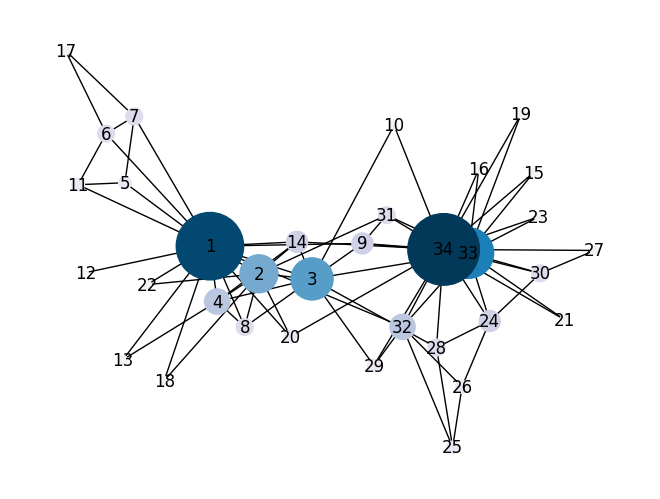

In [114]:
#colors based on degree centrality
node_colors = [v for v in degCent.values()]
# draw the graph
nx.draw(G, with_labels=True, node_size=node_sizes,pos=nx.spring_layout(G),node_color=node_colors, cmap=plt.cm.PuBu)#Greens

#PuBu stands for "Pu" (purple) to "Bu" (blue), and it is a sequential colormap that ranges from light purple to dark blue.

### B) Degree Centrality – Directed Networks

Undirected networks: use degree

Directed networks: use in-degree or out-degree

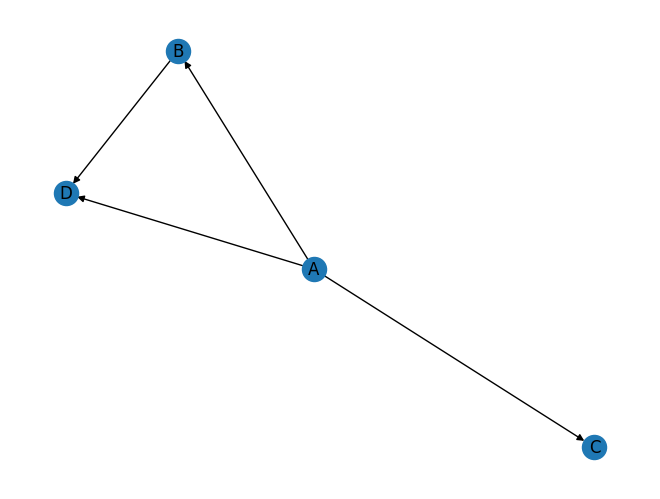

In [115]:
#describe a directedG gllobally
#directed graph
G=nx.DiGraph()

G.add_edge("A","B")
G.add_edge("A","D")
G.add_edge("A","C")
G.add_edge("B","D")

# draw the nodes with labels
nx.draw(G, with_labels=True)

In [116]:
#indegree
indegCent = nx.in_degree_centrality(G)
indegCent

{'A': 0.0,
 'B': 0.3333333333333333,
 'D': 0.6666666666666666,
 'C': 0.3333333333333333}

In [117]:
#out-degree
outdegCent = nx.out_degree_centrality(G)
outdegCent

{'A': 1.0, 'B': 0.3333333333333333, 'D': 0.0, 'C': 0.0}

In [118]:
#A specific node
outdegCent["A"]

1.0

### C) Closeness Centrality

Closeness centrality is a measure of the average distance of a node to all other nodes in the network. The closeness centrality of a node $i$ can be calculated as:

$$C_C(i) = \frac{1}{\sum\limits_{j \neq i} d_{ij}}$$

where $d_{ij}$ is the shortest path distance between nodes $i$ and $j$. The closeness centrality of a node ranges from 0 to 1, with a higher value indicating a shorter average distance to all other nodes in the network.

The closeness centrality of a node measures how quickly it can spread information or influence throughout the network, as nodes with a shorter average distance to all other nodes can communicate more efficiently. In addition, nodes with a high closeness centrality are often located in the center of the network, and their removal can have a significant impact on the network's connectivity.

In [119]:
#Closness centrality
closeCent = nx.closeness_centrality(G_karate)
closeCent

{1: 0.5689655172413793,
 2: 0.4852941176470588,
 3: 0.559322033898305,
 4: 0.4647887323943662,
 5: 0.3793103448275862,
 6: 0.38372093023255816,
 7: 0.38372093023255816,
 8: 0.44,
 9: 0.515625,
 10: 0.4342105263157895,
 11: 0.3793103448275862,
 12: 0.36666666666666664,
 13: 0.3707865168539326,
 14: 0.515625,
 15: 0.3707865168539326,
 16: 0.3707865168539326,
 17: 0.28448275862068967,
 18: 0.375,
 19: 0.3707865168539326,
 20: 0.5,
 21: 0.3707865168539326,
 22: 0.375,
 23: 0.3707865168539326,
 24: 0.39285714285714285,
 25: 0.375,
 26: 0.375,
 27: 0.3626373626373626,
 28: 0.4583333333333333,
 29: 0.4520547945205479,
 30: 0.38372093023255816,
 31: 0.4583333333333333,
 32: 0.5409836065573771,
 33: 0.515625,
 34: 0.55}

In [121]:
#Another way to compute Closeness Centrality of a node
NodeNumber=34
(len(G_karate.nodes())-1)/sum(nx.shortest_path_length(G_karate,NodeNumber).values())

0.55

### D) Betweenness Centrality

Betweenness centrality is a measure of the extent to which a node lies on the shortest paths between other nodes in the network. The betweenness centrality of a node $i$ can be calculated as:

$$C_B(i) = \sum\limits_{s \neq i \neq t} \frac{\sigma_{st}(i)}{\sigma_{st}}$$

where $s$ and $t$ are two nodes in the network, $\sigma_{st}$ is the total number of shortest paths between $s$ and $t$, and $\sigma_{st}(i)$ is the number of shortest paths between $s$ and $t$ that pass through node $i$. 

The betweenness centrality of a node ranges from 0 to 1, with a higher value indicating a greater number of shortest paths that pass through the node. Nodes with a high betweenness centrality are often located on the "bridges" between different clusters or communities in the network, and their removal can have a significant impact on the network's connectivity.

In [138]:
btwnCent = nx.betweenness_centrality(G_karate, endpoints = False)
# endpoints = False states that each node dose not included in computation for shortest path numeration
btwnCent

{1: 0.43763528138528146,
 2: 0.053936688311688304,
 3: 0.14365680615680618,
 4: 0.011909271284271283,
 5: 0.0006313131313131313,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 8: 0.0,
 9: 0.05592682780182781,
 10: 0.0008477633477633478,
 11: 0.0006313131313131313,
 12: 0.0,
 13: 0.0,
 14: 0.04586339586339586,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.03247504810004811,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.017613636363636363,
 25: 0.0022095959595959595,
 26: 0.0038404882154882154,
 27: 0.0,
 28: 0.02233345358345358,
 29: 0.0017947330447330447,
 30: 0.0029220779220779218,
 31: 0.014411976911976909,
 32: 0.13827561327561325,
 33: 0.145247113997114,
 34: 0.30407497594997596}

In [108]:
sorted_btwnCent = {k: v for k, v in sorted(btwnCent.items(), key=lambda item: item[1], reverse=True)}
sorted_btwnCent

{1: 0.43763528138528146,
 34: 0.30407497594997596,
 33: 0.145247113997114,
 3: 0.14365680615680618,
 32: 0.13827561327561325,
 9: 0.05592682780182781,
 2: 0.053936688311688304,
 14: 0.04586339586339586,
 20: 0.03247504810004811,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 28: 0.02233345358345358,
 24: 0.017613636363636363,
 31: 0.014411976911976909,
 4: 0.011909271284271283,
 26: 0.0038404882154882154,
 30: 0.0029220779220779218,
 25: 0.0022095959595959595,
 29: 0.0017947330447330447,
 10: 0.0008477633477633478,
 5: 0.0006313131313131313,
 11: 0.0006313131313131313,
 8: 0.0,
 12: 0.0,
 13: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 27: 0.0}

betwenness centrality values will
be larger in graphs with many nodes. To control for
this, we divide centrality values by the number of
pairs of nodes in the graph (excluding i)

In [112]:
#comparison betweeness centrality in networks with diffrent number of nodes:
#more nodes => bigger betweeness centrality => useing normalization
btwnCent = nx.betweenness_centrality(G_karate,normalized = True, endpoints = False) #defualt = normalize!
btwnCent

{1: 0.43763528138528146,
 2: 0.053936688311688304,
 3: 0.14365680615680618,
 4: 0.011909271284271283,
 5: 0.0006313131313131313,
 6: 0.02998737373737374,
 7: 0.029987373737373736,
 8: 0.0,
 9: 0.05592682780182781,
 10: 0.0008477633477633478,
 11: 0.0006313131313131313,
 12: 0.0,
 13: 0.0,
 14: 0.04586339586339586,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.03247504810004811,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.017613636363636363,
 25: 0.0022095959595959595,
 26: 0.0038404882154882154,
 27: 0.0,
 28: 0.02233345358345358,
 29: 0.0017947330447330447,
 30: 0.0029220779220779218,
 31: 0.014411976911976909,
 32: 0.13827561327561325,
 33: 0.145247113997114,
 34: 0.30407497594997596}

Computing betweenness centrality of all nodes can be
very computationally expensive.

Approximation: rather than computing
betweenness centrality based on all pairs of nodes s,t ,
we can approximate it based on a sample of nodes.

In [123]:
#betweenness centrality approximation
btwnCent_approx = nx.betweenness_centrality(G_karate, normalized = True, endpoints = False, k = 10) #number of samples = k
btwnCent_approx

{1: 0.46578282828282824,
 2: 0.05473484848484848,
 3: 0.10193151755651755,
 4: 0.023825757575757573,
 5: 0.0,
 6: 0.0627840909090909,
 7: 0.06385732323232322,
 8: 0.0,
 9: 0.06715112433862434,
 10: 0.0,
 11: 0.0010732323232323232,
 12: 0.0,
 13: 0.0,
 14: 0.04519330206830207,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.03558787277537278,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.013308080808080807,
 25: 0.0,
 26: 0.0016277356902356902,
 27: 0.0,
 28: 0.010267255892255892,
 29: 0.0,
 30: 0.0,
 31: 0.02178661616161616,
 32: 0.0995806277056277,
 33: 0.18527056277056278,
 34: 0.33998722342472343}

In [124]:
sorted_btwnCent = {k: v for k, v in sorted(btwnCent_approx.items(), key=lambda item: item[1], reverse=True)}
sorted_btwnCent

{1: 0.46578282828282824,
 34: 0.33998722342472343,
 33: 0.18527056277056278,
 3: 0.10193151755651755,
 32: 0.0995806277056277,
 9: 0.06715112433862434,
 7: 0.06385732323232322,
 6: 0.0627840909090909,
 2: 0.05473484848484848,
 14: 0.04519330206830207,
 20: 0.03558787277537278,
 4: 0.023825757575757573,
 31: 0.02178661616161616,
 24: 0.013308080808080807,
 28: 0.010267255892255892,
 26: 0.0016277356902356902,
 11: 0.0010732323232323232,
 5: 0.0,
 8: 0.0,
 10: 0.0,
 12: 0.0,
 13: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 25: 0.0,
 27: 0.0,
 29: 0.0,
 30: 0.0}

#### Betweenness Centrality – Subsets

In [125]:
btwnCent_subset = nx.betweenness_centrality_subset(G_karate, [34, 21, 30, 16, 27, 15, 23, 10],
                                                             [1, 4, 13, 11, 6, 12, 17, 7], normalized=True)
btwnCent_subset

{1: 0.04355008417508417,
 2: 0.0,
 3: 0.01505381192881193,
 4: 0.0019044612794612795,
 5: 0.0,
 6: 0.003787878787878788,
 7: 0.003787878787878788,
 8: 0.0,
 9: 0.012388768638768638,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.012970478595478596,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.007804232804232804,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.012388768638768638,
 33: 0.01664712602212602,
 34: 0.028807419432419434}

### E) Betweenness Centrality – Edges

Betweenness centrality for edges is a measure of the extent to which an edge lies on the shortest paths between other edges in the network. The betweenness centrality of an edge $e$ can be calculated as:

$$C_B(e) = \sum_{s \neq e \neq t} \frac{\sigma_{st}(e)}{\sigma_{st}}$$

where $s$ and $t$ are two nodes in the network, $\sigma_{st}$ is the total number of shortest paths between $s$ and $t$, and $\sigma_{st}(e)$ is the number of shortest paths between $s$ and $t$ that pass through edge $e$.

The betweenness centrality of an edge ranges from 0 to 1, with a higher value indicating a greater number of shortest paths that pass through the edge. Edges with a high betweenness centrality are often located on the "bridges" between different clusters or communities in the network, and their removal can have a significant impact on the network's connectivity.

In [120]:
btwnCent_edge = nx.edge_betweenness_centrality(G_karate, normalized=True)
btwnCent_edge

{(1, 2): 0.025252525252525245,
 (1, 3): 0.0777876807288572,
 (1, 4): 0.02049910873440285,
 (1, 5): 0.0522875816993464,
 (1, 6): 0.07813428401663694,
 (1, 7): 0.07813428401663695,
 (1, 8): 0.0228206434088787,
 (1, 9): 0.07423959482783014,
 (1, 11): 0.0522875816993464,
 (1, 12): 0.058823529411764705,
 (1, 13): 0.04652406417112298,
 (1, 14): 0.04237189825425121,
 (1, 18): 0.04012392835922248,
 (1, 20): 0.045936960642843,
 (1, 22): 0.040123928359222474,
 (1, 32): 0.1272599949070537,
 (2, 3): 0.023232323232323233,
 (2, 4): 0.0077243018419489,
 (2, 8): 0.007422969187675069,
 (2, 14): 0.01240556828792123,
 (2, 18): 0.01869960105254222,
 (2, 20): 0.014633732280791102,
 (2, 22): 0.01869960105254222,
 (2, 31): 0.032280791104320514,
 (3, 4): 0.022430184194890075,
 (3, 8): 0.025214328155504617,
 (3, 9): 0.009175791528732704,
 (3, 10): 0.030803836686189627,
 (3, 14): 0.007630931160342923,
 (3, 28): 0.04119203236850296,
 (3, 29): 0.02278244631185807,
 (3, 33): 0.06898678663384543,
 (4, 8): 0.0033655

### G) Eigenvalue Centrality

Eigenvalue centrality is a measure of the importance of a node in a network based on the importance of its neighbors. The eigenvalue centrality of a node $i$ can be calculated as the principal eigenvector of the adjacency matrix $\mathbf{A}$ of the network:

$$\mathbf{Av} = \lambda \mathbf{v}$$

where $\mathbf{v}$ is the eigenvector corresponding to the largest eigenvalue $\lambda$. The eigenvalue centrality of node $i$ is then given by the $i$-th element of $\mathbf{v}$.

The eigenvalue centrality of a node ranges from 0 to 1, with a higher value indicating a greater importance of the node and its neighbors in the network. Nodes with a high eigenvalue centrality are often located in the center of the network and are well-connected to other highly connected nodes, and their removal can have a significant impact on the network's connectivity.

In [127]:
# Compute the adjacency matrix of the network
A = nx.adjacency_matrix(G_karate)

# Compute the principal eigenvector of the adjacency matrix
eigenvector_centrality = nx.eigenvector_centrality_numpy(G_karate)
eigenvector_centrality

{1: 0.355491444524566,
 2: 0.26595991955249154,
 3: 0.31719250448643166,
 4: 0.21117972037789015,
 5: 0.07596881818306842,
 6: 0.07948304511709886,
 7: 0.07948304511709883,
 8: 0.1709597480447961,
 9: 0.2274039071254003,
 10: 0.1026742507235864,
 11: 0.07596881818306842,
 12: 0.052855697493521134,
 13: 0.08425462871671352,
 14: 0.22647272014248124,
 15: 0.10140326218952478,
 16: 0.10140326218952476,
 17: 0.02363562810459096,
 18: 0.09239953819570242,
 19: 0.10140326218952478,
 20: 0.1479125102933874,
 21: 0.10140326218952479,
 22: 0.09239953819570235,
 23: 0.10140326218952479,
 24: 0.1501185718611531,
 25: 0.05705244054116571,
 26: 0.059206474916778516,
 27: 0.07557941348827224,
 28: 0.13347715338024027,
 29: 0.13107782298371096,
 30: 0.13496081926232803,
 31: 0.17475830231435313,
 32: 0.19103384140654378,
 33: 0.30864421979104795,
 34: 0.3733634702914835}

In [129]:
sorted_EigenCent = {k: v for k, v in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}
sorted_EigenCent

{34: 0.3733634702914835,
 1: 0.355491444524566,
 3: 0.31719250448643166,
 33: 0.30864421979104795,
 2: 0.26595991955249154,
 9: 0.2274039071254003,
 14: 0.22647272014248124,
 4: 0.21117972037789015,
 32: 0.19103384140654378,
 31: 0.17475830231435313,
 8: 0.1709597480447961,
 24: 0.1501185718611531,
 20: 0.1479125102933874,
 30: 0.13496081926232803,
 28: 0.13347715338024027,
 29: 0.13107782298371096,
 10: 0.1026742507235864,
 21: 0.10140326218952479,
 23: 0.10140326218952479,
 15: 0.10140326218952478,
 19: 0.10140326218952478,
 16: 0.10140326218952476,
 18: 0.09239953819570242,
 22: 0.09239953819570235,
 13: 0.08425462871671352,
 6: 0.07948304511709886,
 7: 0.07948304511709883,
 5: 0.07596881818306842,
 11: 0.07596881818306842,
 27: 0.07557941348827224,
 26: 0.059206474916778516,
 25: 0.05705244054116571,
 12: 0.052855697493521134,
 17: 0.02363562810459096}

#### Summery (comparison)

In [139]:
import pandas as pd

# Create a dictionary of data
data = {"Degree": list(degCent.values()),
        "Closeness": list(closeCent.values()),
        "Betweenness": list(btwnCent.values()),
        'Eigenvalue': list(eigenvector_centrality.values())}

# Create a pandas dataframe from the dictionary
df = pd.DataFrame(data)
df

,Degree,Closeness,Betweenness,Eigenvalue
0,0.484848,0.568966,0.437635,0.355491
1,0.272727,0.485294,0.053937,0.265960
2,0.303030,0.559322,0.143657,0.317193
3,0.181818,0.464789,0.011909,0.211180
4,0.090909,0.379310,0.000631,0.075969
5,0.121212,0.383721,0.029987,0.079483
6,0.121212,0.383721,0.029987,0.079483
7,0.121212,0.440000,0.000000,0.170960
8,0.151515,0.515625,0.055927,0.227404
9,0.060606,0.434211,0.000848,0.102674


In [143]:
#sorting
df_sorted = df.sort_values(by='Degree', ascending=False)
df_sorted

,Degree,Closeness,Betweenness,Eigenvalue
33,0.515152,0.550000,0.304075,0.373363
0,0.484848,0.568966,0.437635,0.355491
32,0.363636,0.515625,0.145247,0.308644
2,0.303030,0.559322,0.143657,0.317193
1,0.272727,0.485294,0.053937,0.265960
3,0.181818,0.464789,0.011909,0.211180
31,0.181818,0.540984,0.138276,0.191034
23,0.151515,0.392857,0.017614,0.150119
8,0.151515,0.515625,0.055927,0.227404
13,0.151515,0.515625,0.045863,0.226473


In [146]:
df_two_rows = df.iloc[:2]
df_two_rows

,Degree,Closeness,Betweenness,Eigenvalue
0,0.484848,0.568966,0.437635,0.355491
1,0.272727,0.485294,0.053937,0.265960


## 5- Degree Distributions

The degree distribution of a graph is the
probability distribution of the degrees over the
entire network.

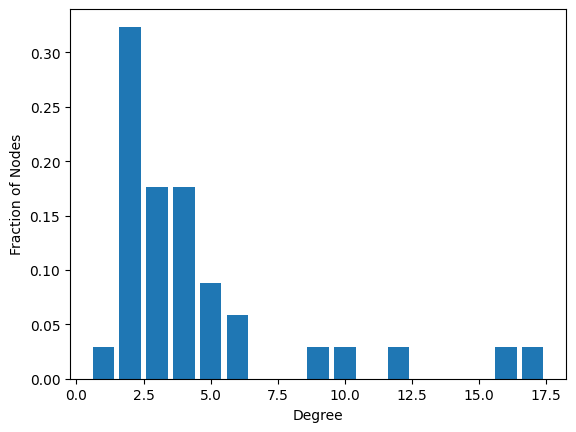

In [6]:
#degrees
degrees = dict(G_karate.degree())
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G_karate)) for i in degree_values]

#histogram
import matplotlib.pyplot as plt
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

#### In-Degree Distributions

The in-degree of a node in a directed graph is
the number of in-links it has.

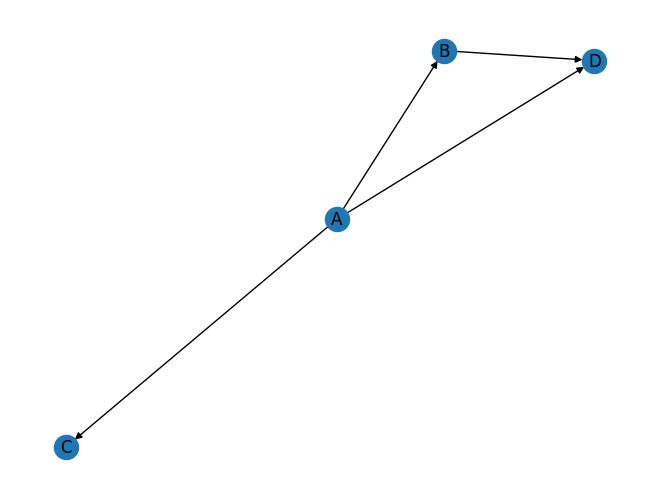

In [143]:
nx.draw(G, with_labels=True)

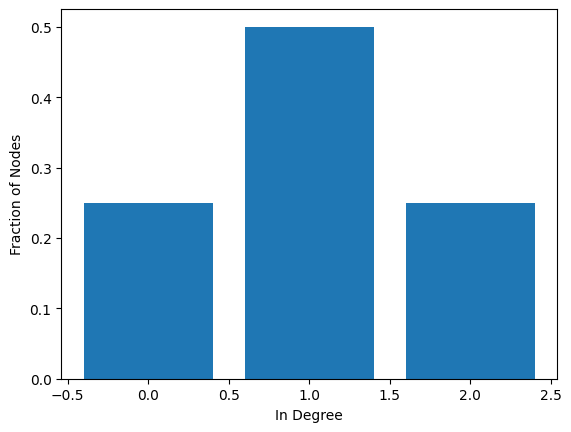

In [9]:
in_degrees = dict(G.in_degree())
in_degree_values = sorted(set(in_degrees.values()))
histogram =[list(in_degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in in_degree_values]
plt.bar(in_degree_values,histogram)
plt.xlabel('In Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

### Power law

The power law degree distribution is characterized by a heavy tail, with a few nodes having a very high degree and the majority having only a few. The degree distribution can be described by a power law function of the form:

$$P(k) \propto k^{-\gamma}$$

where $k$ is the degree of a node, $P(k)$ is the probability of a node having degree $k$, and $\gamma$ is the exponent of the power law. The exponent $\gamma$ is typically in the range of 2 to 3 for most real-world networks.

The power law degree distribution has important implications for the structure and function of networks. For example, networks with a power law degree distribution are often more robust and resilient to random failures, but more vulnerable to targeted attacks on high-degree nodes.

Networks with power law
distribution have many nodes
with small degree and a few
nodes with very large degree.

few riches, lots of poors!

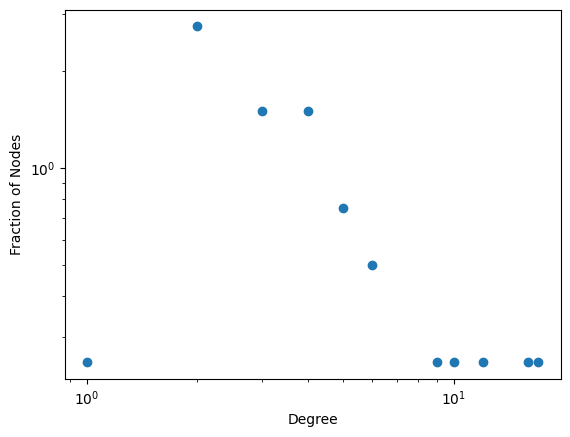

In [147]:
degrees = dict(G_karate.degree())
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

#plotting
plt.plot(degree_values,histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

#### Preferential Attachment in NetworkX

You can use barabasi_albert_graph(n,m) to construct a n-node preferential
attachment network, where each new node attaches to m existing nodes.

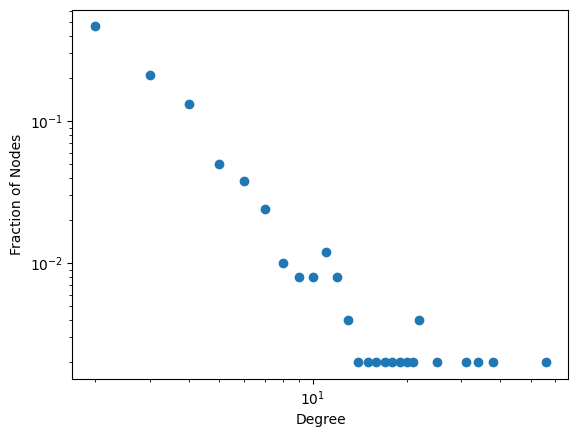

In [148]:
n=500 # n-node
m=2 # each new node attaches to m existing nodes.
G = nx.barabasi_albert_graph(n,m)

#degrees
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

#plotting
plt.plot(degree_values,histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

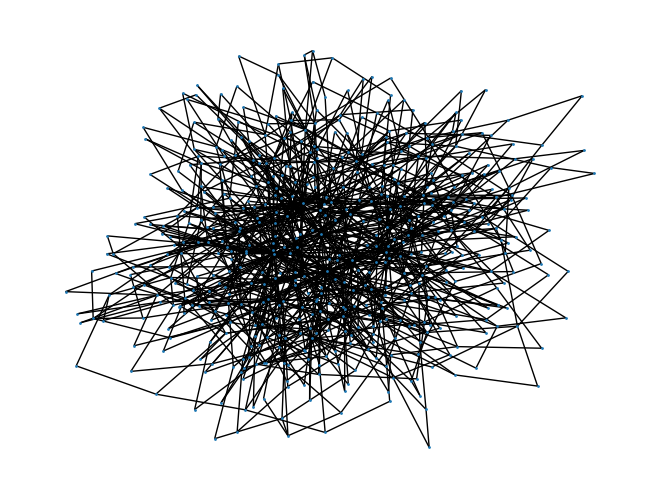

In [149]:
nx.draw(G,node_size=1)

Social networks tend to have high clustering coefficient and small average path length.

In [150]:
print (nx.average_clustering(G)) #rather low clustring(limitation of the model)
print (nx.average_shortest_path_length(G)) #but a short Diameter

0.037948988888447596
3.841827655310621


#### Small World Model

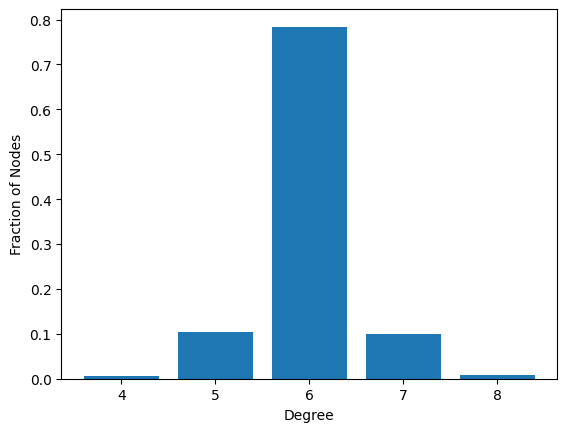

In [8]:
G = nx.watts_strogatz_graph(1000,6,0.04)
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram =[list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

## 6- Community Detection

In [14]:
pip install community

  Using cached community-1.0.0b1.tar.gz (2.2 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 96.9/96.9 kB 113.1 kB/s eta 0:00:00
     ------------------------------------ 242.5/242.5 kB 105.4 kB/s eta 0:00:00
     --------------------------------------- 96.6/96.6 kB 43.5 kB/s eta 0:00:00
  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2138 sha256=d57510a0d651aaef3eee47691a4a8488d11e5a3534ca7965e6699bc0607d7237
  Stored in directory: c:\users\alireza\appdata\local\pip\cache\wheels\5a\c2\f0\b7bbccbe452e1abf93281a168dac809b5bfafd0cb97997ced2
Successfully built community
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.2.2
    Uninstalling Werkzeug-2.2.2:
      Successfully uninstalled Werkzeug-2.2.2
Note: you may need to restart the kernel to use updated packages.


In [18]:
import community

In [36]:
#karate club network
G = nx.karate_club_graph()

# compute the communities using the Label Propagation algorithm
communities = nx.algorithms.community.label_propagation.label_propagation_communities(G)

# print the communities
for i, c in enumerate(communities):
    print(f"Community {i}: {c}")

Community 0: {0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31}
Community 1: {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30}
Community 2: {16, 5, 6}


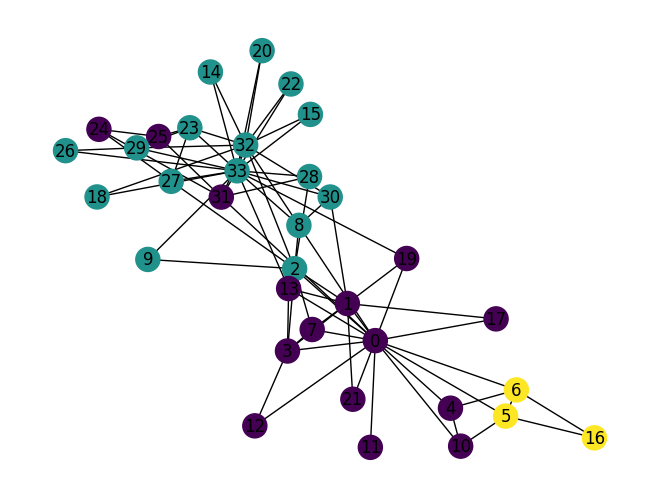

In [37]:
# create a node color list based on the partition

node_colors=[]
for n in G.nodes():
    if n in list(communities)[0]:
        node_colors.append(1)
    elif n in list(communities)[1]:
        node_colors.append(2)
    else:
        node_colors.append(3)

# draw the graph with node colors based on the partition
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.get_cmap('viridis'), with_labels=True)
plt.show()

In [ ]:
#!
G.node['A']['community'] = 0
G.node['B']['community'] = 0
G.node['C']['community'] = 0
G.node['D']['community'] = 0
G.node['E']['community'] = 1
G.node['F']['community'] = 1
G.node['G']['community'] = 1
G.node['H']['community'] = 1

# Additionals

NetworkX provides several built-in networks that can be used for testing and experimentation. These networks are available in the `networkx.generators` module and can be generated using functions that start with the prefix `nx.` followed by the name of the network type.

Here are some examples of the built-in networks in NetworkX:

- `nx.complete_graph(n)` - Generates a complete graph with `n` nodes, where each node is connected to every other node by an undirected edge.

- `nx.cycle_graph(n)` - Generates a cycle graph with `n` nodes, where each node is connected to its two adjacent nodes by an undirected edge, and the last node is connected to the first node.

- `nx.grid_graph(dim)` - Generates a grid graph with `dim` dimensions, where each node represents a cell in a `dim`-dimensional grid, and two nodes are connected by an undirected edge if they are adjacent cells in the grid.

- `nx.balanced_tree(r, h)` - Generates a balanced tree with branching factor `r` and height `h`, where each node has exactly `r` children except for the leaf nodes at height `h`, which have no children.

These are just a few examples of the built-in networks in NetworkX. You can find more information about the available network types and their parameters in the `networkx.generators` module documentation.

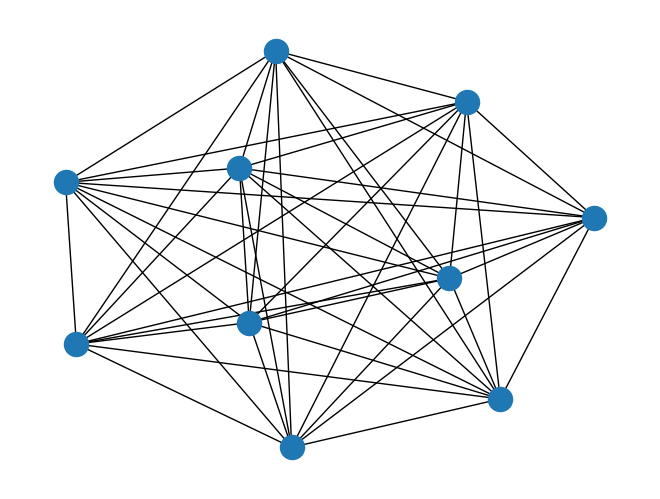

In [55]:
#complete network
n=10 #parameter
nx.complete_graph(n)
nx.draw(nx.complete_graph(n))

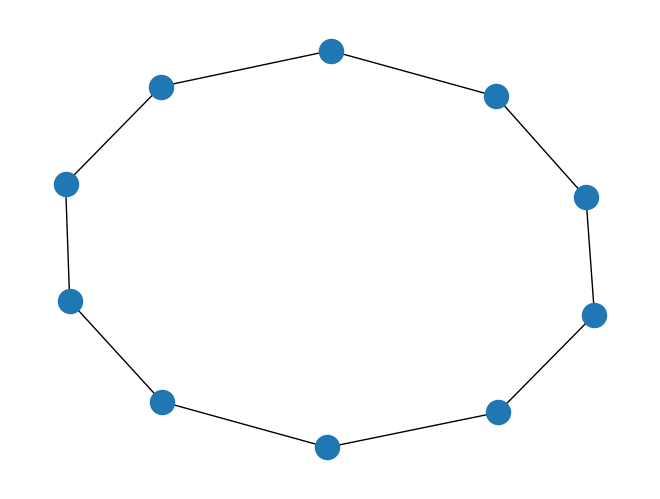

In [56]:
#cycle netwrok
n=10 #parameter
nx.complete_graph(n)
nx.draw(nx.cycle_graph(n))

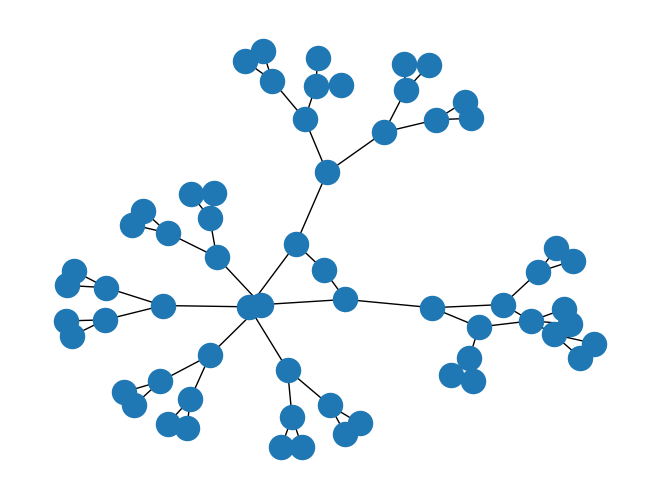

In [57]:
#cycle netwrok
r,h=2,5 #parameter
nx.complete_graph(n)
nx.draw(nx.balanced_tree(r, h))

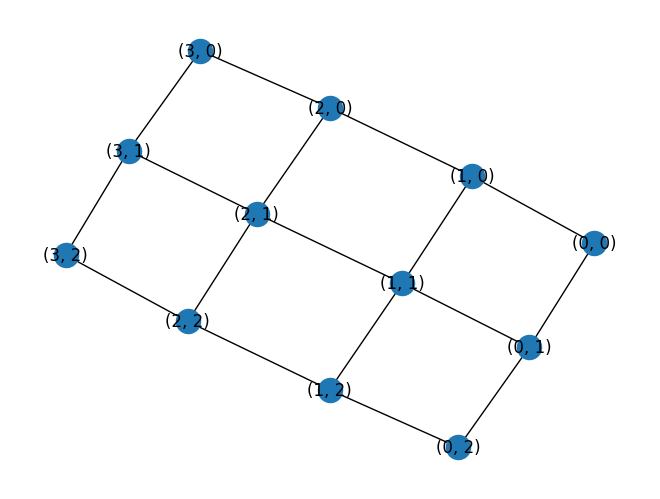

In [153]:
# create a 2D grid graph with 3 rows and 4 columns
G = nx.grid_graph(dim=[3, 4])

# draw the graph
nx.draw(G, with_labels=True)